# Exercise 3.2: Scatterplots, Bubble Charts, & Density Plots

Author: Jordan, Andrew

Date: 07/14/2022

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 640 - Presentation & Visualization\\Assignments'

In [28]:
#Import data
crime = pd.read_csv("data/ex4-2/crimerates-by-state-2005.csv")
life = pd.read_csv("data/ex4-2/life-expectancy.csv")

In [29]:
#Drop US and DC Rows
crime = crime.drop([0,9])
crime.reset_index(drop=True, inplace=True)
crime

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255
5,Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5,4660780
6,Connecticut,2.9,20.0,113.0,138.6,437.1,1824.1,296.8,3477416
7,Delaware,4.4,44.7,154.8,428.2,688.9,2144.0,278.5,839906
8,Florida,5.0,37.1,169.4,496.6,926.3,2658.3,423.3,17783868
9,Georgia,6.2,23.6,154.8,264.3,931.0,2751.1,490.2,9097428


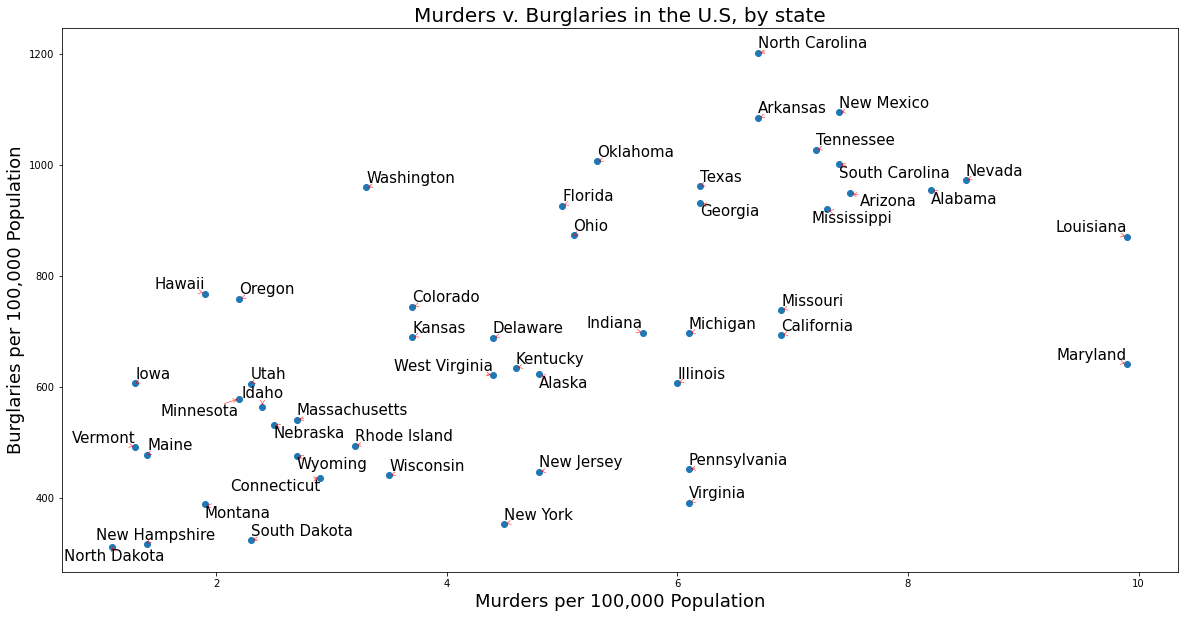

In [36]:
#Create Scatterplot
plt.figure(figsize=(20,10))
plt.scatter(x,y, label=crime['state'])
plt.title('Murders v. Burglaries in the U.S, by state',fontsize=20)
plt.xlabel('Murders per 100,000 Population', fontsize=18)
plt.ylabel('Burglaries per 100,000 Population', fontsize=18)
# for i, txt in enumerate(crime['state']):
#     plt.annotate(txt, (x[i], y[i]))
texts = []
for i, txt in enumerate(crime['state']):
     texts.append(plt.annotate(txt, (crime['murder'][i], crime['burglary'][i]), fontsize=15))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

In [32]:
import math
area_pop = crime['population'] / math.pi
area_pop = area_pop.apply(lambda x: math.sqrt(x))

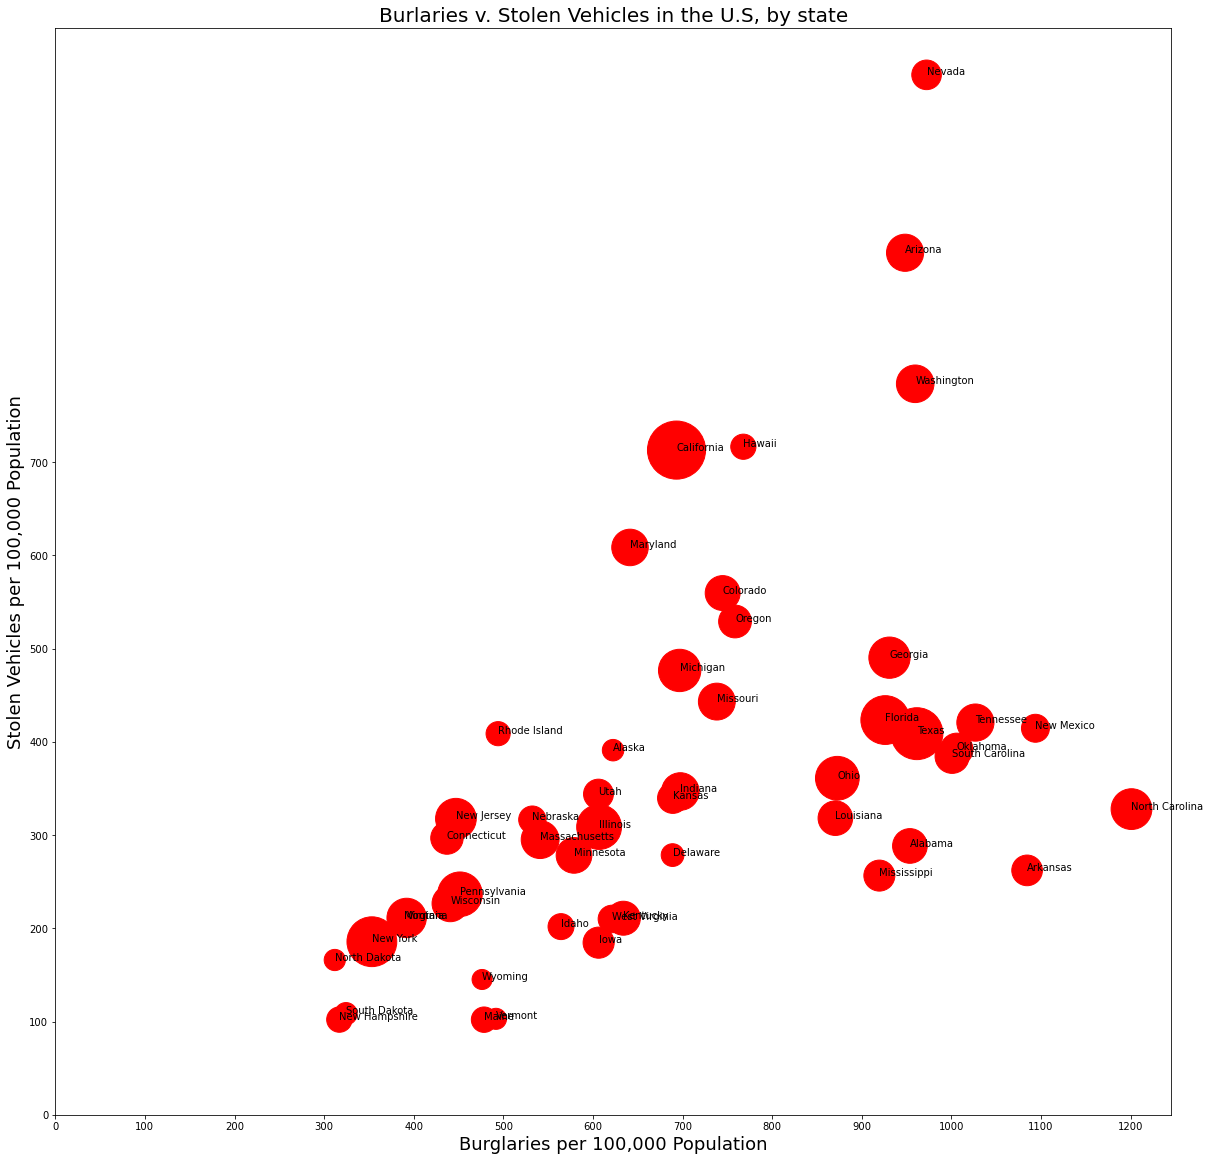

In [37]:
#Create bubble chart
plt.figure(figsize=(20,20))
plt.scatter('burglary','motor_vehicle_theft', s=area_pop, color='red', data=crime)
plt.title('Burlaries v. Stolen Vehicles in the U.S, by state',fontsize=20)
plt.xlabel('Burglaries per 100,000 Population', fontsize=18)
plt.ylabel('Stolen Vehicles per 100,000 Population', fontsize=18)
plt.xticks(range(0, 1300, 100))
plt.yticks(range(0, 800, 100))
for i, txt in enumerate(crime['state']):
    plt.annotate(txt, (crime['burglary'][i], crime['motor_vehicle_theft'][i]))
plt.show()

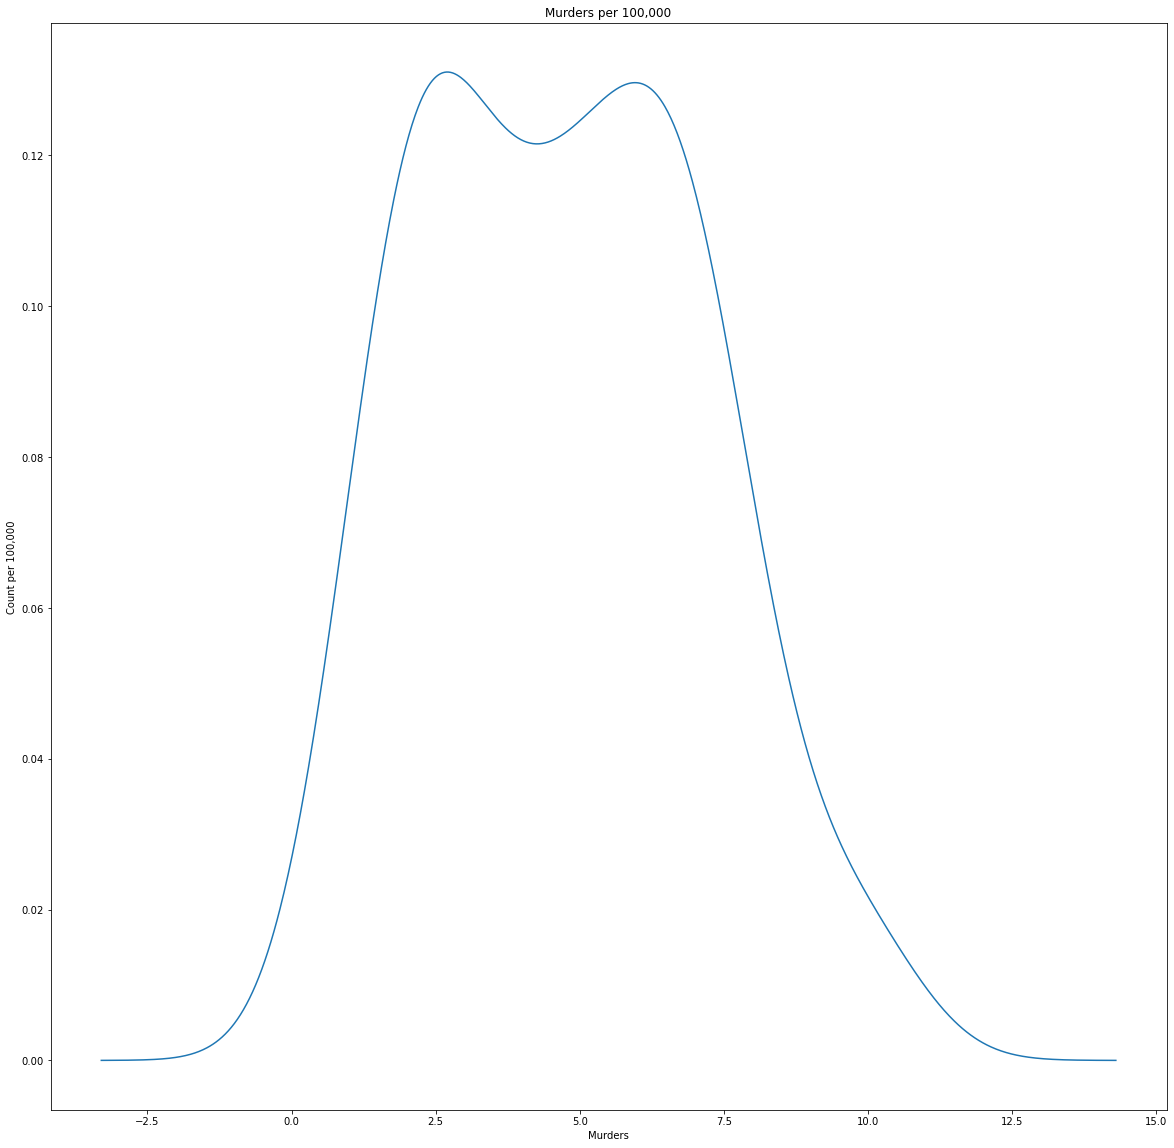

In [39]:
#Create density plot
plt.figure(figsize=(20,20))
crime['murder'].plot.kde()
plt.title('Murders per 100,000')
plt.xlabel('Murders')
plt.ylabel('Count per 100,000')
plt.show()